In [1]:
# Dependencies
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px

In [675]:
# loading historical claims datasets
claims_data =pd.read_excel(r"C:\Users\emutai\Desktop\GIT Stuff\Project\Data.xlsx")
claims_data

POLICY_CODE POLICY_VALID_FROM POLICY_VALID_UPTO  AVG_AGE  \
0        SM/17/PA693/000065/03        2019-08-15        2020-08-14       45   
1        SM/17/PA693/000084/02        2018-06-12        2019-06-11       25   
2        SM/17/PA693/000163/03        2019-07-28        2020-07-27       58   
3        SM/17/PA693/000163/05        2021-07-28        2022-07-27       60   
4        SM/17/PA693/000205/04        2020-08-12        2021-08-11       16   
...                        ...               ...               ...      ...   
14915  SMIN/22/PC830/000567/01        2022-03-14        2023-03-13       17   
14916  SMIN/22/PC830/000658/01        2022-03-30        2023-03-29       29   
14917  SMIN/22/PC830/000673/01        2022-03-29        2023-03-28       28   
14918  SMIN/22/PC830/000721/01        2022-03-18        2023-03-17       25   
14919  SMIN/22/PC830/000774/01        2022-04-01        2023-03-31       47   

       AVG_WEIGHT  AVG_HEIGHT GRP_INDV  CLAIMS_AMT  BASIC_PREMIUM     CL_RT  \
0       69.500000  167.000000        I    17800.60       95708.41   18.5987   
1       52.000000  166.000000        I    78631.81      146371.66   53.7206   
2       65.500000  145.000000        I   326444.46      139370.00  234.2286   
3       65.500000  145.000000        I    57942.50      348425.00   16.6298   
4       26.142857   47.142857        I   153876.80      447592.61   34.3787   
...           ...         ...      ...         ...            ...       ...   
14915    1.000000    1.000000        I   119907.86       53641.05  223.5374   
14916    1.000000    1.000000        I    79655.00      136949.99   58.1635   
14917    1.000000    1.000000        I   125442.70      288876.51   43.4243   
14918    1.000000    1.000000        I    65340.75       66795.75   97.8217   
14919    1.000000    1.000000        I   300000.00       33615.41  892.4478   

           LR_Type  
0      Non Onerous  
1      Non Onerous  
2          Onerous  
3      Non Onerous  
4      Non Onerous  
...            ...  
14915      Onerous  
14916  Non Onerous  
14917  Non Onerous  
14918      Onerous  
14919      Onerous  

[14920 rows x 11 columns]

<Figure size 1000x400 with 0 Axes>

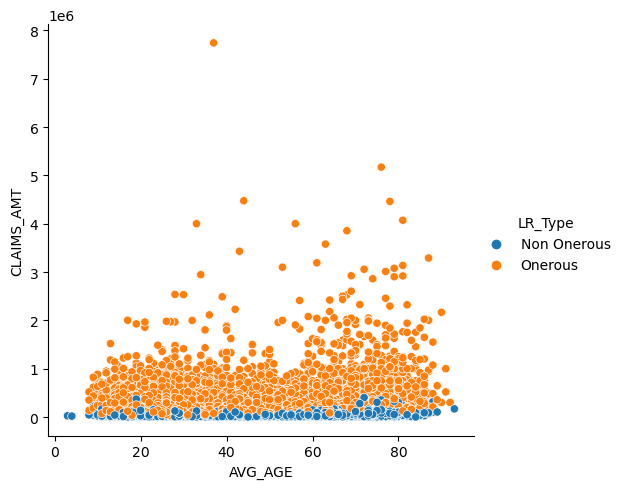

In [795]:
fig = plt.figure(figsize=(10, 4))
sns.relplot(data=claims_data,x=claims_data['AVG_AGE'],y=claims_data['CLAIMS_AMT'],hue='LR_Type')
plt.show()

<Figure size 1000x400 with 0 Axes>

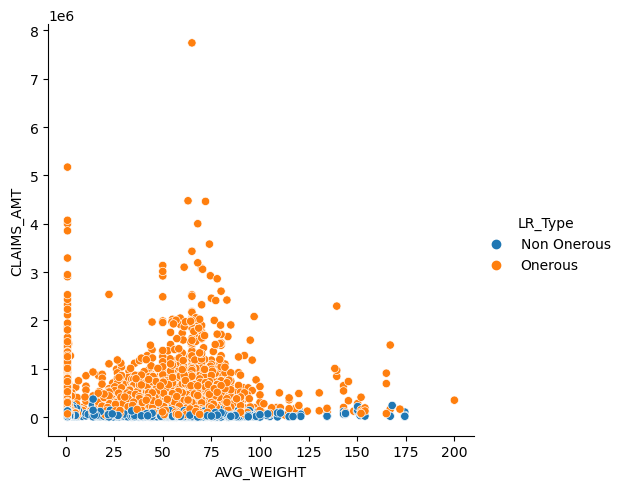

In [796]:
fig = plt.figure(figsize=(10, 4))
sns.relplot(data=claims_data,x=claims_data['AVG_WEIGHT'],y=claims_data['CLAIMS_AMT'],hue='LR_Type')
plt.show()

<Figure size 1000x400 with 0 Axes>

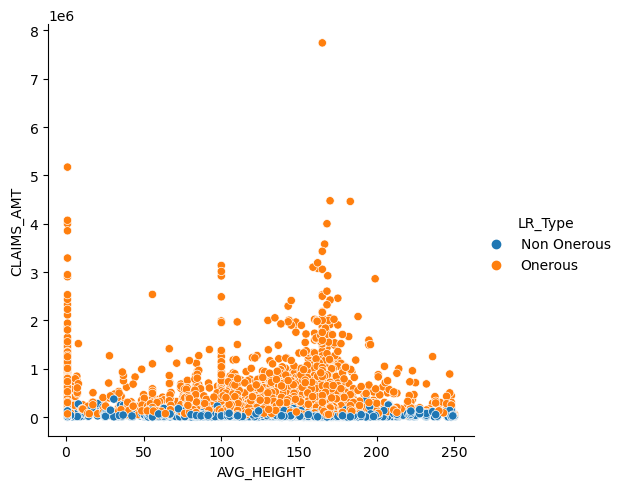

In [797]:
fig = plt.figure(figsize=(10, 4))
sns.relplot(data=claims_data,x=claims_data['AVG_HEIGHT'],y=claims_data['CLAIMS_AMT'],hue='LR_Type')
plt.show()

In [676]:
# Removing unnecessary columns/ not useful during modelling
claims_data_model=claims_data.drop(["POLICY_VALID_FROM"],axis=1)
claims_data_model=claims_data_model.drop(["POLICY_VALID_UPTO"],axis=1)
claims_data_model=claims_data_model.drop(["GRP_INDV"],axis=1)
claims_data_model=claims_data_model.drop(["CL_RT"],axis=1)

In [677]:
claims_data_model.T

0                      1      \
POLICY_CODE    SM/17/PA693/000065/03  SM/17/PA693/000084/02   
AVG_AGE                           45                     25   
AVG_WEIGHT                      69.5                   52.0   
AVG_HEIGHT                     167.0                  166.0   
CLAIMS_AMT                   17800.6               78631.81   
BASIC_PREMIUM               95708.41              146371.66   
LR_Type                  Non Onerous            Non Onerous   

                               2                      3      \
POLICY_CODE    SM/17/PA693/000163/03  SM/17/PA693/000163/05   
AVG_AGE                           58                     60   
AVG_WEIGHT                      65.5                   65.5   
AVG_HEIGHT                     145.0                  145.0   
CLAIMS_AMT                 326444.46                57942.5   
BASIC_PREMIUM               139370.0               348425.0   
LR_Type                      Onerous            Non Onerous   

                               4                      5      \
POLICY_CODE    SM/17/PA693/000205/04  SM/17/PA693/000280/01   
AVG_AGE                           16                     27   
AVG_WEIGHT                 26.142857                  60.25   
AVG_HEIGHT                 47.142857                  104.5   
CLAIMS_AMT                  153876.8               87069.57   
BASIC_PREMIUM              447592.61                47892.0   
LR_Type                  Non Onerous                Onerous   

                               6                          7      \
POLICY_CODE    SM/17/PA693/000280/02  SMA1B1/17/PA693/000004/04   
AVG_AGE                           28                         58   
AVG_WEIGHT                     60.25                        1.0   
AVG_HEIGHT                     104.5                        1.0   
CLAIMS_AMT                  67317.56                   750000.0   
BASIC_PREMIUM               36767.84                   66720.49   
LR_Type                      Onerous                    Onerous   

                                   8                          9      ...  \
POLICY_CODE    SMA1B1/17/PA693/000010/04  SMA1B1/17/PA693/000015/04  ...   
AVG_AGE                               46                         53  ...   
AVG_WEIGHT                          85.0                       68.0  ...   
AVG_HEIGHT                    107.333333                      157.0  ...   
CLAIMS_AMT                     499064.59                  162780.29  ...   
BASIC_PREMIUM                  121262.77                  143494.77  ...   
LR_Type                          Onerous                    Onerous  ...   

                                 14910                    14911  \
POLICY_CODE    SMIN/22/PC830/000491/01  SMIN/22/PC830/000500/01   
AVG_AGE                             29                       20   
AVG_WEIGHT                         1.0                      1.0   
AVG_HEIGHT                         1.0                      1.0   
CLAIMS_AMT                     80234.6                139410.12   
BASIC_PREMIUM                170052.24                262282.75   
LR_Type                    Non Onerous              Non Onerous   

                                 14912                    14913  \
POLICY_CODE    SMIN/22/PC830/000511/01  SMIN/22/PC830/000555/01   
AVG_AGE                             14                       42   
AVG_WEIGHT                         1.0                      1.0   
AVG_HEIGHT                         1.0                      1.0   
CLAIMS_AMT                    41064.65                 103787.0   
BASIC_PREMIUM                246739.16                196278.09   
LR_Type                    Non Onerous              Non Onerous   

                                 14914                    14915  \
POLICY_CODE    SMIN/22/PC830/000561/01  SMIN/22/PC830/000567/01   
AVG_AGE                             55                       17   
AVG_WEIGHT                         1.0                      1.0   
AVG_HEIGHT                  

In [678]:
#check my dataset overview
claims_data_model.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14920 entries, 0 to 14919
Data columns (total 7 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   POLICY_CODE    14920 non-null  object 
 1   AVG_AGE        14920 non-null  int64  
 2   AVG_WEIGHT     14920 non-null  float64
 3   AVG_HEIGHT     14920 non-null  float64
 4   CLAIMS_AMT     14920 non-null  float64
 5   BASIC_PREMIUM  14920 non-null  float64
 6   LR_Type        14920 non-null  object 
dtypes: float64(4), int64(1), object(2)
memory usage: 816.1+ KB


In [679]:
claims_data_model.isnull().sum()

POLICY_CODE      0
AVG_AGE          0
AVG_WEIGHT       0
AVG_HEIGHT       0
CLAIMS_AMT       0
BASIC_PREMIUM    0
LR_Type          0
dtype: int64

In [680]:
claims_data_model["LR_Type"].value_counts()

Non Onerous    7746
Onerous        7174
Name: LR_Type, dtype: int64

In [681]:
#Dealing with continous variables
claims_data_model.describe().round(2)

AVG_AGE  AVG_WEIGHT  AVG_HEIGHT  CLAIMS_AMT  BASIC_PREMIUM
count  14920.00    14920.00    14920.00    14920.00       14920.00
mean      38.22       42.13      103.22   181570.48      174470.34
std       19.13       30.01       72.21   285702.73      130677.85
min        3.00        1.00        1.00      105.00        5807.13
25%       23.00        1.00        1.00    39529.00       78876.00
50%       32.00       50.50      133.50    91547.59      138828.67
75%       53.00       65.00      165.00   203227.82      228681.00
max       93.00      200.00      250.00  7741918.50     1520477.05

C:\Users\emutai\Anaconda4\lib\site-packages\seaborn\_decorators.py:36: FutureWarning:

Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.



<AxesSubplot:xlabel='CLAIMS_AMT'>

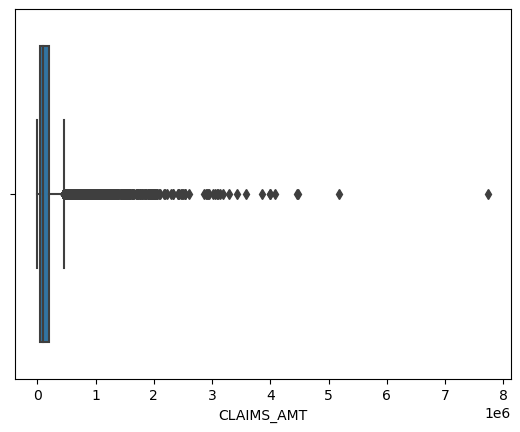

In [682]:
#Checking distribution to help decide the imputation method to use for the continous variables
sns.boxplot(claims_data_model['CLAIMS_AMT'])

C:\Users\emutai\Anaconda4\lib\site-packages\seaborn\_decorators.py:36: FutureWarning:

Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.



<AxesSubplot:xlabel='AVG_AGE'>

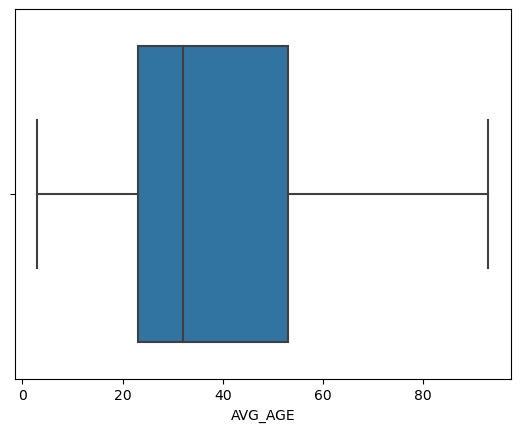

In [813]:
#Checking distribution to help decide the imputation method to use for the continous variables
sns.boxplot(claims_data_model['AVG_AGE'])

In [683]:
#Data Preprocessing
#Removing outliers in CLAIMS_AMT
factor=2
upper_lim=claims_data_model['CLAIMS_AMT'].mean()+claims_data_model['CLAIMS_AMT'].std()*factor
lower_lim=claims_data_model['CLAIMS_AMT'].mean()-claims_data_model['CLAIMS_AMT'].std()*factor

In [684]:
claims_data_model_valid=claims_data_model[(claims_data_model['CLAIMS_AMT']>=lower_lim) & (claims_data_model['CLAIMS_AMT']<=upper_lim)]

In [687]:
claims_data_model_valid

POLICY_CODE  AVG_AGE  AVG_WEIGHT  AVG_HEIGHT  CLAIMS_AMT  \
0        SM/17/PA693/000065/03       45   69.500000  167.000000    17800.60   
1        SM/17/PA693/000084/02       25   52.000000  166.000000    78631.81   
2        SM/17/PA693/000163/03       58   65.500000  145.000000   326444.46   
3        SM/17/PA693/000163/05       60   65.500000  145.000000    57942.50   
4        SM/17/PA693/000205/04       16   26.142857   47.142857   153876.80   
...                        ...      ...         ...         ...         ...   
14915  SMIN/22/PC830/000567/01       17    1.000000    1.000000   119907.86   
14916  SMIN/22/PC830/000658/01       29    1.000000    1.000000    79655.00   
14917  SMIN/22/PC830/000673/01       28    1.000000    1.000000   125442.70   
14918  SMIN/22/PC830/000721/01       25    1.000000    1.000000    65340.75   
14919  SMIN/22/PC830/000774/01       47    1.000000    1.000000   300000.00   

       BASIC_PREMIUM      LR_Type  
0           95708.41  Non Onerous  
1          146371.66  Non Onerous  
2          139370.00      Onerous  
3          348425.00  Non Onerous  
4          447592.61  Non Onerous  
...              ...          ...  
14915       53641.05      Onerous  
14916      136949.99  Non Onerous  
14917      288876.51  Non Onerous  
14918       66795.75      Onerous  
14919       33615.41      Onerous  

[14372 rows x 7 columns]

In [688]:
claims_data_model_valid.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 14372 entries, 0 to 14919
Data columns (total 7 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   POLICY_CODE    14372 non-null  object 
 1   AVG_AGE        14372 non-null  int64  
 2   AVG_WEIGHT     14372 non-null  float64
 3   AVG_HEIGHT     14372 non-null  float64
 4   CLAIMS_AMT     14372 non-null  float64
 5   BASIC_PREMIUM  14372 non-null  float64
 6   LR_Type        14372 non-null  object 
dtypes: float64(4), int64(1), object(2)
memory usage: 898.2+ KB


C:\Users\emutai\Anaconda4\lib\site-packages\seaborn\_decorators.py:36: FutureWarning:

Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.



<AxesSubplot:xlabel='CLAIMS_AMT'>

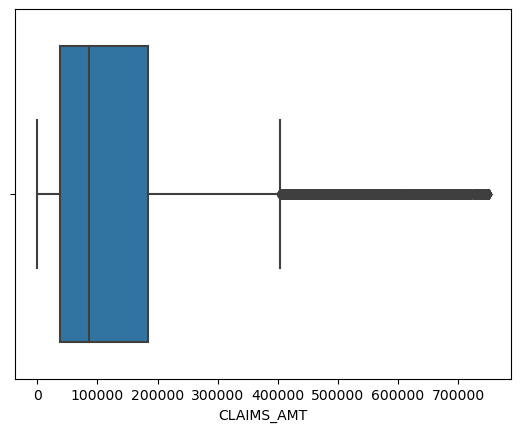

In [689]:
sns.boxplot(claims_data_model_valid['CLAIMS_AMT'])

C:\Users\emutai\Anaconda4\lib\site-packages\seaborn\_decorators.py:36: FutureWarning:

Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.



<AxesSubplot:xlabel='AVG_WEIGHT'>

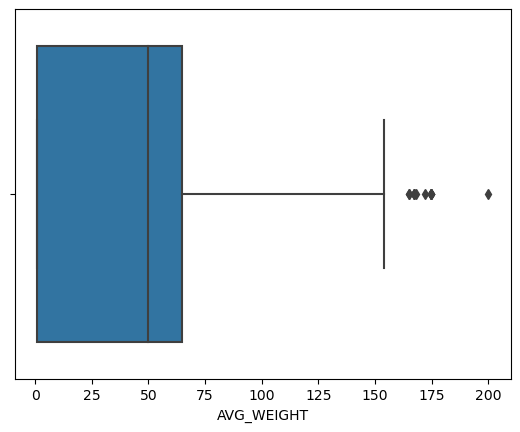

In [690]:
#AVG_WEIGHT before removing outliers
sns.boxplot(claims_data_model_valid['AVG_WEIGHT'])

In [691]:
#Data Preprocessing
#Removing outliers in AVG_WEIGHT
factor=2
upper_lim=claims_data_model_valid['AVG_WEIGHT'].mean()+claims_data_model_valid['AVG_WEIGHT'].std()*factor
lower_lim=claims_data_model_valid['AVG_WEIGHT'].mean()-claims_data_model_valid['AVG_WEIGHT'].std()*factor
claims_data_model_valid=claims_data_model_valid[(claims_data_model_valid['AVG_WEIGHT']>=lower_lim) & (claims_data_model_valid['AVG_WEIGHT']<=upper_lim)]

C:\Users\emutai\Anaconda4\lib\site-packages\seaborn\_decorators.py:36: FutureWarning:

Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.



<AxesSubplot:xlabel='AVG_WEIGHT'>

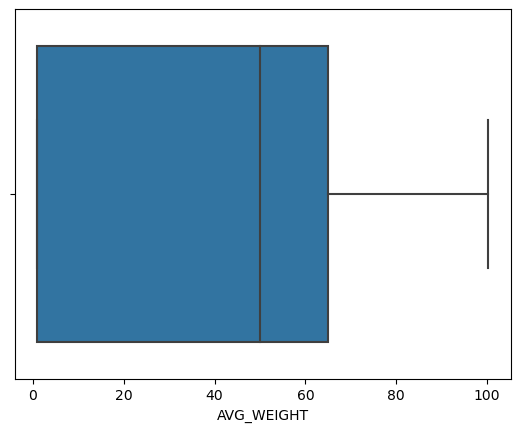

In [692]:
#AVG_WEIGHT after removing outliers
sns.boxplot(claims_data_model_valid['AVG_WEIGHT'])

In [693]:
claims_data_model_valid.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 14285 entries, 0 to 14919
Data columns (total 7 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   POLICY_CODE    14285 non-null  object 
 1   AVG_AGE        14285 non-null  int64  
 2   AVG_WEIGHT     14285 non-null  float64
 3   AVG_HEIGHT     14285 non-null  float64
 4   CLAIMS_AMT     14285 non-null  float64
 5   BASIC_PREMIUM  14285 non-null  float64
 6   LR_Type        14285 non-null  object 
dtypes: float64(4), int64(1), object(2)
memory usage: 892.8+ KB


C:\Users\emutai\Anaconda4\lib\site-packages\seaborn\_decorators.py:36: FutureWarning:

Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.



<AxesSubplot:xlabel='BASIC_PREMIUM'>

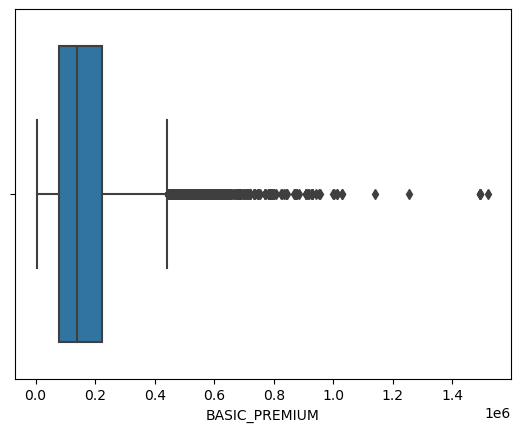

In [694]:
#BASIC_PREMIUM before removing outliers
sns.boxplot(claims_data_model_valid['BASIC_PREMIUM'])

In [695]:
#Removing outliers in BASIC_PREMIUM
factor=2
upper_lim=claims_data_model_valid['BASIC_PREMIUM'].mean()+claims_data_model_valid['BASIC_PREMIUM'].std()*factor
lower_lim=claims_data_model_valid['BASIC_PREMIUM'].mean()-claims_data_model_valid['BASIC_PREMIUM'].std()*factor
claims_data_model_valid=claims_data_model_valid[(claims_data_model_valid['BASIC_PREMIUM']>=lower_lim) & (claims_data_model_valid['BASIC_PREMIUM']<=upper_lim)]

C:\Users\emutai\Anaconda4\lib\site-packages\seaborn\_decorators.py:36: FutureWarning:

Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.



<AxesSubplot:xlabel='BASIC_PREMIUM'>

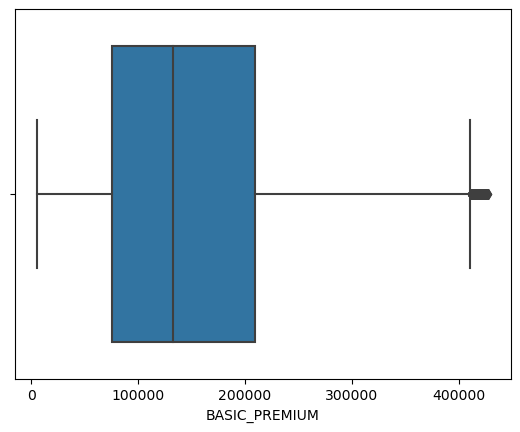

In [696]:
#BASIC_PREMIUM after removing outliers
sns.boxplot(claims_data_model_valid['BASIC_PREMIUM'])

In [697]:
claims_data_model_valid.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 13629 entries, 0 to 14919
Data columns (total 7 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   POLICY_CODE    13629 non-null  object 
 1   AVG_AGE        13629 non-null  int64  
 2   AVG_WEIGHT     13629 non-null  float64
 3   AVG_HEIGHT     13629 non-null  float64
 4   CLAIMS_AMT     13629 non-null  float64
 5   BASIC_PREMIUM  13629 non-null  float64
 6   LR_Type        13629 non-null  object 
dtypes: float64(4), int64(1), object(2)
memory usage: 851.8+ KB


In [698]:
claims_data_model_valid.head()

POLICY_CODE  AVG_AGE  AVG_WEIGHT  AVG_HEIGHT  CLAIMS_AMT  \
0  SM/17/PA693/000065/03       45       69.50       167.0    17800.60   
1  SM/17/PA693/000084/02       25       52.00       166.0    78631.81   
2  SM/17/PA693/000163/03       58       65.50       145.0   326444.46   
3  SM/17/PA693/000163/05       60       65.50       145.0    57942.50   
5  SM/17/PA693/000280/01       27       60.25       104.5    87069.57   

   BASIC_PREMIUM      LR_Type  
0       95708.41  Non Onerous  
1      146371.66  Non Onerous  
2      139370.00      Onerous  
3      348425.00  Non Onerous  
5       47892.00      Onerous

In [699]:
fig=px.scatter(x=claims_data_model_valid['AVG_AGE'],y=claims_data_model_valid['CLAIMS_AMT']
              ,opacity=0.25,template='plotly',
              trendline_color_override='red',title='Claims Loss Ratio Versus Average Age'
              )
fig.show()

In [700]:
#check if claims are normally distributed, as it is wat determines the target column
fig=px.histogram(claims_data_model_valid,x=["CLAIMS_AMT"],template='plotly',title='Histogram of Claims')
fig.show()

In [701]:
#Data Scaling
from sklearn.preprocessing import StandardScaler,MinMaxScaler

In [702]:
#Claims distribution is skewed, so lets do transformation using log transform
claims_data_model_valid_copy=claims_data_model_valid.copy()
claims_data_model_valid_copy['CLAIMS_AMT_TRANSFORMED']=np.log(claims_data_model_valid['CLAIMS_AMT'])
fig=px.histogram(claims_data_model_valid_copy,x=["CLAIMS_AMT_TRANSFORMED"],template='plotly',title='Histogram of Claims after Transformation')
fig.show()

In [703]:
claims_data_model_valid_copy

POLICY_CODE  AVG_AGE  AVG_WEIGHT  AVG_HEIGHT  CLAIMS_AMT  \
0        SM/17/PA693/000065/03       45       69.50       167.0    17800.60   
1        SM/17/PA693/000084/02       25       52.00       166.0    78631.81   
2        SM/17/PA693/000163/03       58       65.50       145.0   326444.46   
3        SM/17/PA693/000163/05       60       65.50       145.0    57942.50   
5        SM/17/PA693/000280/01       27       60.25       104.5    87069.57   
...                        ...      ...         ...         ...         ...   
14915  SMIN/22/PC830/000567/01       17        1.00         1.0   119907.86   
14916  SMIN/22/PC830/000658/01       29        1.00         1.0    79655.00   
14917  SMIN/22/PC830/000673/01       28        1.00         1.0   125442.70   
14918  SMIN/22/PC830/000721/01       25        1.00         1.0    65340.75   
14919  SMIN/22/PC830/000774/01       47        1.00         1.0   300000.00   

       BASIC_PREMIUM      LR_Type  CLAIMS_AMT_TRANSFORMED  
0           95708.41  Non Onerous                9.786987  
1          146371.66  Non Onerous               11.272532  
2          139370.00      Onerous               12.696015  
3          348425.00  Non Onerous               10.967206  
5           47892.00      Onerous               11.374463  
...              ...          ...                     ...  
14915       53641.05      Onerous               11.694479  
14916      136949.99  Non Onerous               11.285460  
14917      288876.51  Non Onerous               11.739604  
14918       66795.75      Onerous               11.087371  
14919       33615.41      Onerous               12.611538  

[13629 rows x 8 columns]

In [567]:
minmax_scaler=MinMaxScaler()

In [623]:
claims_data_model_valid_copy['AVG_AGE_SCALED']=minmax_scaler.fit_transform(claims_data_model_valid_copy[['AVG_AGE']])
claims_data_model_valid_copy['AVG_WEIGHT_SCALED']=minmax_scaler.fit_transform(claims_data_model_valid_copy[['AVG_WEIGHT']])
claims_data_model_valid_copy['AVG_HEIGHT_SCALED']=minmax_scaler.fit_transform(claims_data_model_valid_copy[['AVG_HEIGHT']])
claims_data_model_valid_copy['CLAIMS_AM_SCALED']=minmax_scaler.fit_transform(claims_data_model_valid_copy[['CLAIMS_AMT']])
claims_data_model_valid_copy['BASIC_PREMIUM_SCALED']=minmax_scaler.fit_transform(claims_data_model_valid_copy[['BASIC_PREMIUM']])
claims_data_model_valid_copy['CLAIMS_AMT_TRANSFORMED']=minmax_scaler.fit_transform(claims_data_model_valid_copy[['CLAIMS_AMT_TRANSFORMED']])

In [704]:
claims_data_model_valid_copy.head()

POLICY_CODE  AVG_AGE  AVG_WEIGHT  AVG_HEIGHT  CLAIMS_AMT  \
0  SM/17/PA693/000065/03       45       69.50       167.0    17800.60   
1  SM/17/PA693/000084/02       25       52.00       166.0    78631.81   
2  SM/17/PA693/000163/03       58       65.50       145.0   326444.46   
3  SM/17/PA693/000163/05       60       65.50       145.0    57942.50   
5  SM/17/PA693/000280/01       27       60.25       104.5    87069.57   

   BASIC_PREMIUM      LR_Type  CLAIMS_AMT_TRANSFORMED  
0       95708.41  Non Onerous                9.786987  
1      146371.66  Non Onerous               11.272532  
2      139370.00      Onerous               12.696015  
3      348425.00  Non Onerous               10.967206  
5       47892.00      Onerous               11.374463

In [705]:
claims_data_model_valid_scaled=claims_data_model_valid_copy#.drop(['AVG_AGE_SCALED','AVG_WEIGHT_SCALED','AVG_HEIGHT_SCALED','CLAIMS_AM_SCALED','BASIC_PREMIUM_SCALED'],axis=1)

In [706]:
claims_data_model_valid_scaled

POLICY_CODE  AVG_AGE  AVG_WEIGHT  AVG_HEIGHT  CLAIMS_AMT  \
0        SM/17/PA693/000065/03       45       69.50       167.0    17800.60   
1        SM/17/PA693/000084/02       25       52.00       166.0    78631.81   
2        SM/17/PA693/000163/03       58       65.50       145.0   326444.46   
3        SM/17/PA693/000163/05       60       65.50       145.0    57942.50   
5        SM/17/PA693/000280/01       27       60.25       104.5    87069.57   
...                        ...      ...         ...         ...         ...   
14915  SMIN/22/PC830/000567/01       17        1.00         1.0   119907.86   
14916  SMIN/22/PC830/000658/01       29        1.00         1.0    79655.00   
14917  SMIN/22/PC830/000673/01       28        1.00         1.0   125442.70   
14918  SMIN/22/PC830/000721/01       25        1.00         1.0    65340.75   
14919  SMIN/22/PC830/000774/01       47        1.00         1.0   300000.00   

       BASIC_PREMIUM      LR_Type  CLAIMS_AMT_TRANSFORMED  
0           95708.41  Non Onerous                9.786987  
1          146371.66  Non Onerous               11.272532  
2          139370.00      Onerous               12.696015  
3          348425.00  Non Onerous               10.967206  
5           47892.00      Onerous               11.374463  
...              ...          ...                     ...  
14915       53641.05      Onerous               11.694479  
14916      136949.99  Non Onerous               11.285460  
14917      288876.51  Non Onerous               11.739604  
14918       66795.75      Onerous               11.087371  
14919       33615.41      Onerous               12.611538  

[13629 rows x 8 columns]

BASIC_PREMIUM            -0.243057
AVG_AGE                  -0.029118
AVG_WEIGHT                0.000005
AVG_HEIGHT                0.005111
CLAIMS_AMT                0.603822
CLAIMS_AMT_TRANSFORMED    0.680606
LR_Type_encoded           1.000000
Name: LR_Type_encoded, dtype: float64


<AxesSubplot:>

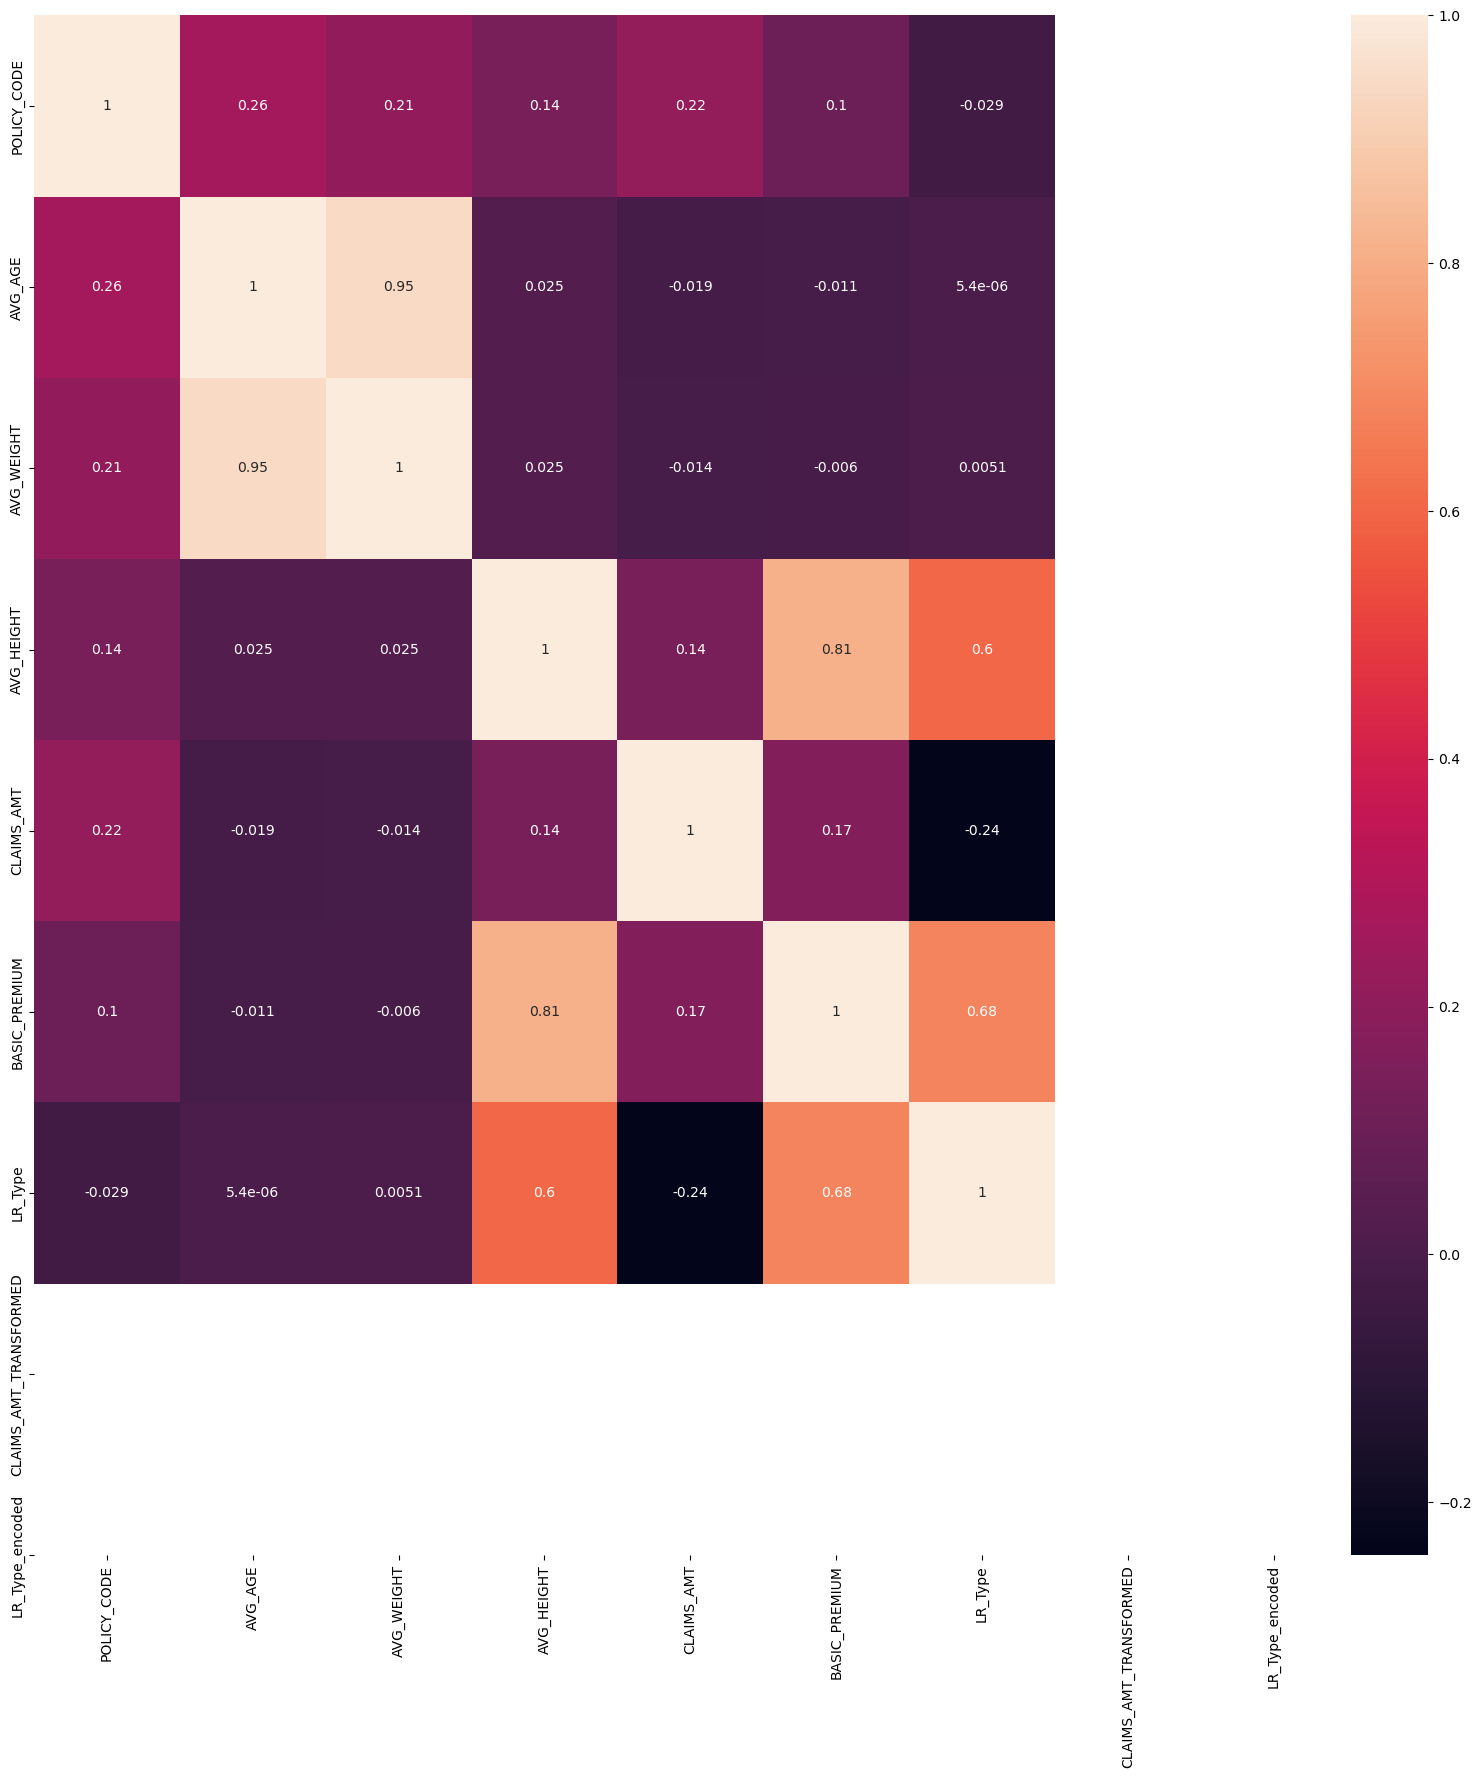

In [809]:
#check feature correlation
cm_a = claims_data_model_valid_scaled.corr()
print(cm_a.LR_Type_encoded.sort_values().tail(10))
plt.figure(figsize=(20,20))
sns.heatmap(cm_a, xticklabels=claims_data_model_valid_scaled.columns, yticklabels=claims_data_model_valid_scaled.columns,annot=True)

In [707]:
import plotly.express as px 
fig = px.histogram(claims_data_model_valid_scaled, x=["BASIC_PREMIUM"], template = 'plotly_dark', title = 'Histogram of Premiums')
fig.show()

In [708]:
fig = px.histogram(claims_data_model_valid_scaled, x=["CLAIMS_AMT_TRANSFORMED"], template = 'plotly_dark', title = 'Histogram of Claims')
fig.show()

In [709]:
fig = px.histogram(claims_data_model_valid_scaled, x=["AVG_AGE"], template = 'plotly_dark', title = 'Histogram of Age')
fig.show()

In [710]:
fig = px.histogram(claims_data_model_valid_scaled, x=["AVG_WEIGHT"], template = 'plotly_dark', title = 'Histogram of Weight')
fig.show()

In [711]:
fig = px.histogram(claims_data_model_valid_scaled, x=["AVG_HEIGHT"], template = 'plotly_dark', title = 'Histogram of Height')
fig.show()

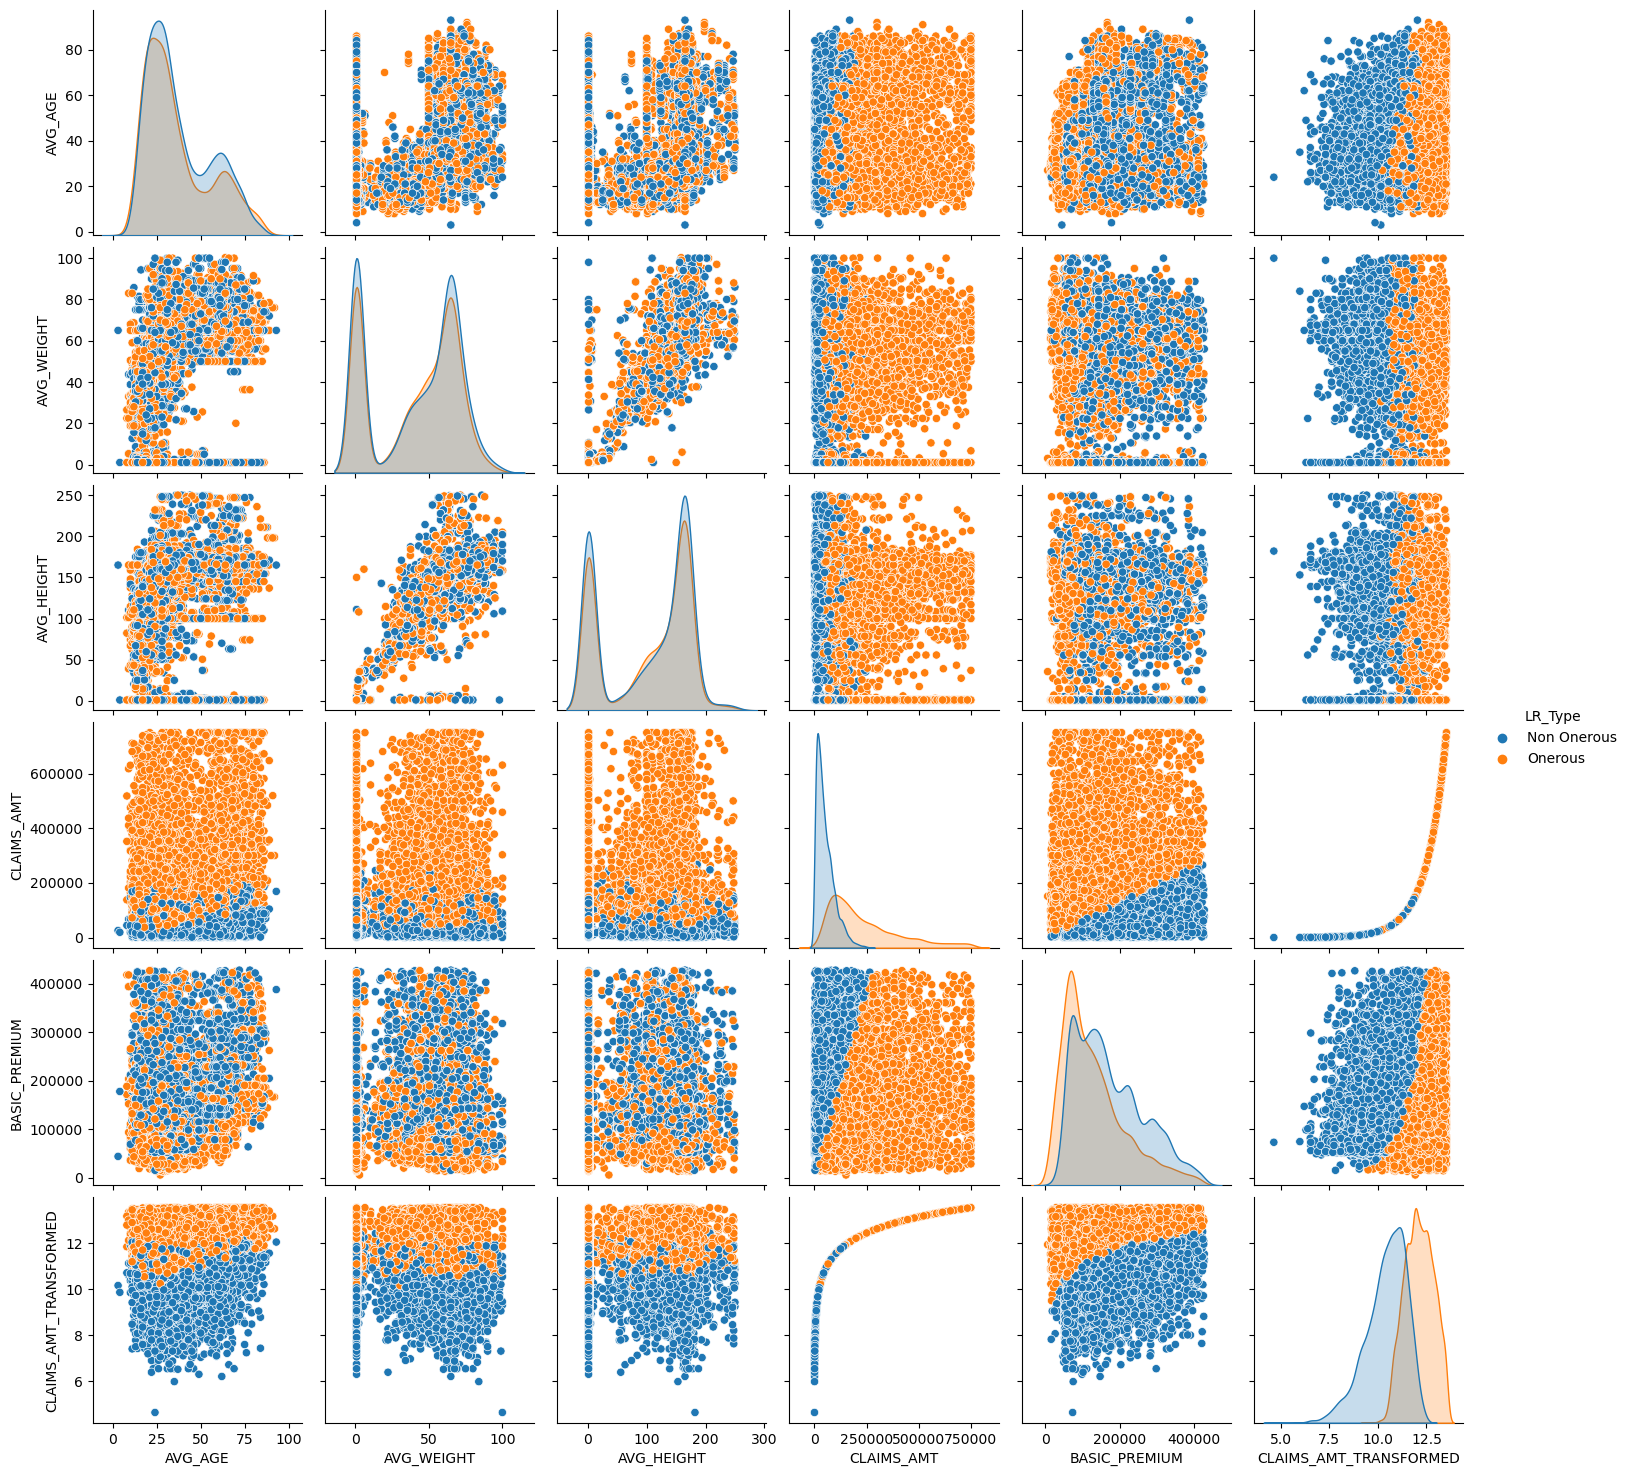

In [712]:
sns.pairplot(data=claims_data_model_valid_scaled,hue='LR_Type')

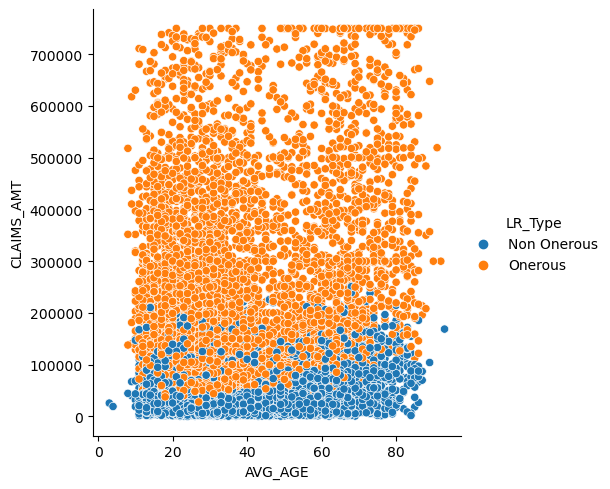

In [790]:
sns.relplot(data=claims_data_model_valid_scaled,x=claims_data_model_valid_scaled['AVG_AGE'],y=claims_data_model_valid_scaled['CLAIMS_AMT'],hue='LR_Type')

In [713]:
claims_data_model_valid_scaled['LR_Type']=claims_data_model_valid_scaled['LR_Type'].astype('category')

In [750]:
claims_data_model_valid_scaled.dtypes

POLICY_CODE                 object
AVG_AGE                      int64
AVG_WEIGHT                 float64
AVG_HEIGHT                 float64
CLAIMS_AMT                 float64
BASIC_PREMIUM              float64
LR_Type                   category
CLAIMS_AMT_TRANSFORMED     float64
LR_Type_encoded               int8
dtype: object

In [714]:
claims_data_model_valid_scaled['LR_Type_encoded']=claims_data_model_valid_scaled['LR_Type'].cat.codes

In [812]:
claims_data_model_valid_scaled.T

0                      1      \
POLICY_CODE             SM/17/PA693/000065/03  SM/17/PA693/000084/02   
AVG_AGE                                    45                     25   
AVG_WEIGHT                               69.5                   52.0   
AVG_HEIGHT                              167.0                  166.0   
CLAIMS_AMT                            17800.6               78631.81   
BASIC_PREMIUM                        95708.41              146371.66   
LR_Type                           Non Onerous            Non Onerous   
CLAIMS_AMT_TRANSFORMED               9.786987              11.272532   
LR_Type_encoded                             0                      0   

                                        2                      3      \
POLICY_CODE             SM/17/PA693/000163/03  SM/17/PA693/000163/05   
AVG_AGE                                    58                     60   
AVG_WEIGHT                               65.5                   65.5   
AVG_HEIGHT                              145.0                  145.0   
CLAIMS_AMT                          326444.46                57942.5   
BASIC_PREMIUM                        139370.0               348425.0   
LR_Type                               Onerous            Non Onerous   
CLAIMS_AMT_TRANSFORMED              12.696015              10.967206   
LR_Type_encoded                             1                      0   

                                        5                      6      \
POLICY_CODE             SM/17/PA693/000280/01  SM/17/PA693/000280/02   
AVG_AGE                                    27                     28   
AVG_WEIGHT                              60.25                  60.25   
AVG_HEIGHT                              104.5                  104.5   
CLAIMS_AMT                           87069.57               67317.56   
BASIC_PREMIUM                         47892.0               36767.84   
LR_Type                               Onerous                Onerous   
CLAIMS_AMT_TRANSFORMED              11.374463              11.117176   
LR_Type_encoded                             1                      1   

                                            7                          8      \
POLICY_CODE             SMA1B1/17/PA693/000004/04  SMA1B1/17/PA693/000010/04   
AVG_AGE                                        58                         46   
AVG_WEIGHT                                    1.0                       85.0   
AVG_HEIGHT                                    1.0                 107.333333   
CLAIMS_AMT                               750000.0                  499064.59   
BASIC_PREMIUM                            66720.49                  121262.77   
LR_Type                                   Onerous                    Onerous   
CLAIMS_AMT_TRANSFORMED                  13.527828                  13.120491   
LR_Type_encoded                                 1                          1   

                                            9                          10     \
POLICY_CODE             SMA1B1/17/PA693/000015/04  SMA1B1/17/PA693/000015/05   
AVG_AGE                                        53                         54   
AVG_WEIGHT                                   68.0                       68.0   
AVG_HEIGHT                                  157.0                      157.0   
CLAIMS_AMT                              162780.29                   62545.17   
BASIC_PREMIUM                           143494.77                  143494.77   
LR_Type                                   Onerous                Non Onerous   
CLAIMS_AMT_TRANSFORMED                  12.000157                  11.043644   
LR_Type_encoded                                 1                          0   

                        ...                    14910                    14911  \
POLICY_CODE             ...  SMIN/22/PC830/000491/01  SMIN/22/PC830/000500/01   
AVG_AGE                 ...                       29                       20   
AVG_WEIGHT              ...     

In [771]:
claims_data_model_valid_scaled.dtypes

POLICY_CODE                 object
AVG_AGE                      int64
AVG_WEIGHT                 float64
AVG_HEIGHT                 float64
CLAIMS_AMT                 float64
BASIC_PREMIUM              float64
LR_Type                   category
CLAIMS_AMT_TRANSFORMED     float64
LR_Type_encoded               int8
dtype: object

In [716]:
claims_data_model_valid_scaled_model=claims_data_model_valid_scaled.drop(['POLICY_CODE','LR_Type','CLAIMS_AMT','CLAIMS_AMT_TRANSFORMED'],axis=1)

In [777]:
claims_data_model_valid_scaled_model.head()

AVG_AGE  AVG_WEIGHT  AVG_HEIGHT  BASIC_PREMIUM  LR_Type_encoded
0       45       69.50       167.0       95708.41                0
1       25       52.00       166.0      146371.66                0
2       58       65.50       145.0      139370.00                1
3       60       65.50       145.0      348425.00                0
5       27       60.25       104.5       47892.00                1

In [767]:
#Check for Feature correlation

claims_data_model_valid_scaled_model.corr()

AVG_AGE  AVG_WEIGHT  AVG_HEIGHT  BASIC_PREMIUM  \
AVG_AGE          1.000000    0.257424    0.208598       0.215436   
AVG_WEIGHT       0.257424    1.000000    0.945300      -0.019204   
AVG_HEIGHT       0.208598    0.945300    1.000000      -0.013958   
BASIC_PREMIUM    0.215436   -0.019204   -0.013958       1.000000   
LR_Type_encoded -0.029118    0.000005    0.005111      -0.243057   

                 LR_Type_encoded  
AVG_AGE                -0.029118  
AVG_WEIGHT              0.000005  
AVG_HEIGHT              0.005111  
BASIC_PREMIUM          -0.243057  
LR_Type_encoded         1.000000

In [752]:
claims_data_model_valid_scaled_model.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 13629 entries, 0 to 14919
Data columns (total 5 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   AVG_AGE          13629 non-null  int64  
 1   AVG_WEIGHT       13629 non-null  float64
 2   AVG_HEIGHT       13629 non-null  float64
 3   BASIC_PREMIUM    13629 non-null  float64
 4   LR_Type_encoded  13629 non-null  int8   
dtypes: float64(3), int64(1), int8(1)
memory usage: 1.0 MB


In [772]:
claims_data_model_valid_scaled_model.shape

(13629, 5)

In [721]:
x_data=claims_data_model_valid_scaled_model.drop(['LR_Type_encoded'],axis=1)
y_data=claims_data_model_valid_scaled_model['LR_Type_encoded']

In [722]:
#My Feature variables data
x_data

AVG_AGE  AVG_WEIGHT  AVG_HEIGHT  BASIC_PREMIUM
0           45       69.50       167.0       95708.41
1           25       52.00       166.0      146371.66
2           58       65.50       145.0      139370.00
3           60       65.50       145.0      348425.00
5           27       60.25       104.5       47892.00
...        ...         ...         ...            ...
14915       17        1.00         1.0       53641.05
14916       29        1.00         1.0      136949.99
14917       28        1.00         1.0      288876.51
14918       25        1.00         1.0       66795.75
14919       47        1.00         1.0       33615.41

[13629 rows x 4 columns]

In [723]:
#my prediction/target variable data
y_data

0        0
1        0
2        1
3        0
5        1
        ..
14915    1
14916    0
14917    0
14918    1
14919    1
Name: LR_Type_encoded, Length: 13629, dtype: int8

In [724]:
#Splitting my feature and target data into training and test data sets
from sklearn.model_selection import train_test_split

x_data_train, x_data_test, y_data_train, y_data_test = train_test_split(x_data, y_data, test_size=0.3, random_state=1)

In [353]:
# Getting the best estimator to use on training my model
from sklearn.ensemble import RandomForestClassifier
np.random.seed(42)
for i in range(10, 200, 10):
    print(f"Trying model with {i} estimators...")
    model = RandomForestClassifier(n_estimators=i).fit(x_data_train, y_data_train)
    print(f"Model accuracy on test set: {model.score(x_data_test, y_data_test) * 100}%")
    print("")

Trying model with 10 estimators...
Model accuracy on test set: 64.31890437759844%

Trying model with 20 estimators...
Model accuracy on test set: 64.63683052090975%

Trying model with 30 estimators...
Model accuracy on test set: 64.73465394962093%

Trying model with 40 estimators...
Model accuracy on test set: 65.05258009293226%

Trying model with 50 estimators...
Model accuracy on test set: 64.66128637808755%

Trying model with 60 estimators...
Model accuracy on test set: 65.32159452188799%

Trying model with 70 estimators...
Model accuracy on test set: 65.19931523599902%

Trying model with 80 estimators...
Model accuracy on test set: 64.93030080704328%

Trying model with 90 estimators...
Model accuracy on test set: 65.17485937882122%

Trying model with 100 estimators...
Model accuracy on test set: 64.97921252139888%

Trying model with 110 estimators...
Model accuracy on test set: 64.8813890926877%

Trying model with 120 estimators...
Model accuracy on test set: 65.05258009293226%

Tr

In [810]:
# importing the ensemble model for training my model
clf = RandomForestClassifier(n_estimators=150 )
clf.fit(x_data_train, y_data_train)

RandomForestClassifier(n_estimators=150)

In [726]:
y_data_preds = clf.predict(x_data_test)

In [727]:
y_data_preds

array([0, 1, 0, ..., 1, 0, 1], dtype=int8)

In [728]:
#My model evaluation
clf.score(x_data_train, y_data_train)

0.9696016771488469

In [729]:
# Evaluate the model on the test set
clf.score(x_data_test, y_data_test)

0.6593299095133285

In [730]:
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

print(classification_report(y_data_test, y_data_preds))

              precision    recall  f1-score   support

           0       0.67      0.70      0.68      2143
           1       0.65      0.61      0.63      1946

    accuracy                           0.66      4089
   macro avg       0.66      0.66      0.66      4089
weighted avg       0.66      0.66      0.66      4089



In [814]:

print(accuracy_score(y_data_test, y_data_preds))

0.6593299095133285


In [815]:
print(confusion_matrix(y_data_test, y_data_preds))

[[1508  635]
 [ 758 1188]]


In [731]:
import pickle

# Save my model to file
pickle.dump(clf, open(r"C:\Users\emutai\Desktop\GIT Stuff\Project\Claims_Pred_RF.pkl", "wb"))

In [746]:
# Load my saved model and make a prediction
loaded_model = pickle.load(open(r"C:\Users\emutai\Desktop\GIT Stuff\Project\Claims_Pred_RF.pkl", "rb"))
loaded_model.score(x_data_test, y_data_test)

0.6593299095133285

In [803]:
testdata=pd.read_csv(r"C:\Users\emutai\Desktop\GIT Stuff\Project\testingset.csv")
testdata.head()

AVG_AGE  AVG_WEIGHT  AVG_HEIGHT  BASIC_PREMIUM
0       25   81.000000  130.333333      393179.63
1       37    1.000000    1.000000       73226.48
2       27   70.000000  177.000000       66795.75
3       15    1.000000    1.000000      105674.12
4       23   25.666666   59.666666      191058.56

In [804]:
prediction=loaded_model.predict(testdata)

In [805]:
prediction

array([0, 1, 0, ..., 1, 0, 1], dtype=int8)